In [42]:
#1
#reading in libraries required
import numpy as np
import pandas as pd
#takes in GCT and optional boolean value
def read_GCT(GCT,*args):
    #makes panda dataframe frame from gct delimited by tabs; skip first two rows
    df = pd.read_table(GCT,delimiter='\t',skiprows=2)
    # if there is a secondary value passed in if true print rows and columns; differs by two from GCT because it only includes first two rows
    if len(args)>0:
        if args[0] is True:
            print(len(df))
            print(len(df.columns)) 
    return df

In [60]:
#2
BRCA = 'BRCA_minimal_60x19.gct'
small = read_GCT(BRCA,True)

60
21


In [61]:
#2b
large = 'BRCA_large_20783x40.gct'
big = read_GCT(large)

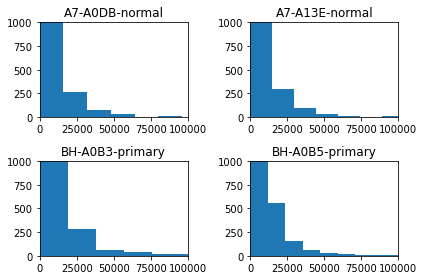

In [131]:
#3 
#using pyplot
import matplotlib
import matplotlib.pyplot as plt
#make list of samples
def plot4Samples(sample):
    cols = ['A7-A0DB-normal','A7-A13E-normal', 'BH-A0B3-primary','BH-A0B5-primary']
    # use subplots to plot all at once
    figure, axis = plt.subplots(2, 2)   
    #index to keep track of which sample
    index = 0
    for i in range(2):
        for j in range(2):
            #without setting x and y limits it just appears as one single bar
            axis[i,j].hist(sample[cols[index]],50)
            axis[i,j].set_xlim(0,100000)
            axis[i,j].set_ylim(0,1000)
            axis[i,j].set_title(cols[index])
            index = index +1
    #formatting
    figure.tight_layout()
    plt.show
plot4Samples(big)

In [126]:
#4 
#function to get a list of mean, median, and standard deviation
def getStats(samples,means,medians,sds):
    for s in samples.keys():
        means.append(np.mean(samples[s]))
        medians.append(np.median(samples[s]))
        sds.append(np.std(samples[s]))
#taking out the first two columns
samples = big.loc[:,'A7-A0CE-normal':'BH-A0BC-primary']
means = []
medians = []
sds = []
getStats(samples,means,medians,sds)
stats = pd.DataFrame(
    {
        "Sample name:": samples.keys(),
        "Mean" : means,
        "Median": medians,
        "Standard Deviations": sds
    }
)
print(stats)

       Sample name:         Mean  Median  Standard Deviations
0    A7-A0CE-normal  3308.877255   814.0         12725.225360
1    A7-A0CH-normal  3046.316942   630.0         14145.110877
2    A7-A0D9-normal  2628.131550   350.0         17826.962614
3    A7-A0DB-normal  2354.674445   362.0         13973.578219
4    A7-A13E-normal  2380.702593   427.0         13373.175053
5    A7-A13F-normal  2493.380215   527.0         12477.292199
6    A7-A13G-normal  3509.542463   454.0         30473.930420
7    AC-A23H-normal  3396.675312   659.0         20073.372089
8    AC-A2FB-normal  3675.583169   792.0         15577.602082
9    AC-A2FF-normal  3743.660492   935.0         14826.656271
10   AC-A2FM-normal  2714.893663   578.0         11431.197617
11   BH-A0AU-normal  2436.466679   641.0          8961.141637
12   BH-A0AY-normal  2412.727951   567.0          9362.166744
13   BH-A0AZ-normal  3216.765337   836.0         10744.247026
14   BH-A0B3-normal  2879.876149   772.0          9737.474286
15   BH-

       Sample name:         Mean  Median
0    A7-A0CE-normal  1483.952256   566.5
1    A7-A0CH-normal  1226.842654   440.5
2    A7-A0D9-normal   958.923439   245.0
3    A7-A0DB-normal   915.061698   256.0
4    A7-A13E-normal   951.364467   296.0
5    A7-A13F-normal  1040.999251   372.5
6    A7-A13G-normal  1281.722145   320.0
7    AC-A23H-normal  1381.503903   460.0
8    AC-A2FB-normal  1550.663013   554.0
9    AC-A2FF-normal  1737.988398   667.0
10   AC-A2FM-normal  1189.578593   410.0
11   BH-A0AU-normal  1223.027534   460.0
12   BH-A0AY-normal  1074.948193   399.0
13   BH-A0AZ-normal  1621.079288   595.0
14   BH-A0B3-normal  1434.160928   551.0
15   BH-A0B5-normal  1091.059613   238.0
16   BH-A0B7-normal  1184.856929   424.5
17   BH-A0B8-normal  1040.875160   259.0
18   BH-A0BA-normal   986.037799   367.5
19   BH-A0Bc-normal  1024.975888   378.0
20  A7-A0CE-primary  1458.018820   396.0
21  A7-A0CH-primary  1075.177021   306.0
22  A7-A0D9-primary  1265.841424   350.0
23  A7-A0DB-prim

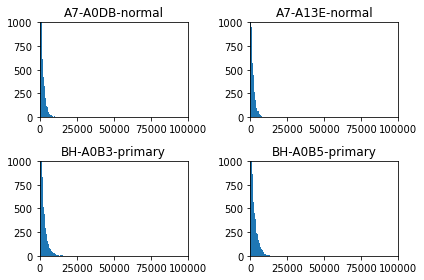

In [134]:
#5 
#to make a deep copy of samples
import copy
samples2 = copy.deepcopy(samples)
sd = []
#getting standard deviation of each row
for i in range(1,len(samples2)):
    sd.append((np.std(samples2.iloc[i]),i))
#sort by standard deviation
sd.sort()
#getting index of 90th percentile
upper = int(0.9*len(sd))
#remove from sorted list 90th percentile
for j in range(upper,len(sd)):
    samples2.drop(sd[j][1],inplace=True)
means2 = []
medians2 = []
sds2 = []
getStats(samples2,means2,medians2,sds2)
stats2 = pd.DataFrame(
    {
        "Sample name:": samples2.keys(),
        "Mean" : means2,
        "Median": medians2,
    }
)
print(stats2)
plot4Samples(samples2)